In [1]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec

In [2]:
fp = codecs.open("2BEXXX01.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("text > body")
text = body.getText()

In [3]:
twitter = Okt()
results = []
lines = text.split("\r\n")
for line in lines:
    # 형태소 분석 
    # 단어의 기본형 사용
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)

C:\Users\user\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


제 2 편 추적 음모 
 14 장 추적 
 귀 녀 모습 한번 쳐다보다 떠나다 하다 집안 이리저리 기웃 거리 던 강 포수 윤씨 부인 인사 올리다 중문 나서다 치수 뒷모습 보다 실망 얼굴 일그러지다 강 포수 치수 뒤 따르다 나오다 수 없다 문전 하인 들 즐비하다 늘어서다 상전 전송 하다 위해 기다리다 있다 
 치수 거들다 떠보다 않다 나귀 등 오르다 말고삐 잡다 수동 엉 성하다 수염 묻히다 작다 입술 다물다 늘어서다 하인 들 일별 던지다 
 삼수 묘 하다 웃다 복 삼수 곁눈질 하다 짐 실 다른 하다 필 나귀 텁석부리 강 포수 경계 하다 말고삐 잡다 코 불다 
 나리 마님 안녕하다 다녀오다 
 제 가끔 인사 하다 최 치수 말 안장 앉다 강물 바라보다 있다 
 의외로 단촐 출발 이다 하인 들 서너 명 수행 하리 김 평산 동행 하다 않다 예상 하다 기운 세다 편도 아니다 수동 하다 사람 데리 강 포수 함께 출발 것 엉거주춤 서다 있다 하인 들 언덕길 내려가다 두 필 나귀 멍청하다 내려다보다 
 일행 강 끼 나귀 사람 들 발자국 다져지다 길 천천히 간다 몇 번 씩 돌아보다 하다 아쉬움 가득 차다 강 포수 최 참판 댁 지붕 시야 사라지다 눈 내리다 깔다 고개 차츰 숙어 지면 발끝 눈길 떨어지다 
 머 영영 안 돌아오다 기다 
 나귀 강 포수 곁눈질 하다 끝내 밉다 덥다 못 하다 코 분다 앞서다 나귀 등 최 치수 뒷모습 짐짝 보이다 
 온 천지 허퉁 한 거 매다 마음 허퉁 하다 갈다 바르다 못 잡겄다 총 싫다 돈 싫다 
 길섶 뻗다 풀잎 이슬 남아 있다 짚 세기 젖다 날씨 변덕 부리다 흩어지다 있다 구름 훨씬 빠르다 움직 있다 것 같다 하늘 휑하 높다 푸른 빛 차갑다 들판 바람 일렁 있다 목동 소 몰다 들판 지르다 송아지 어미 소 뒤 졸래졸래 따라가다 
 십리 길 거의 지나다 동안 아무 입 떼다 않다 이 중 앞장서다 수동 얼굴 간혹 긴장 빛 돌다 생각 잠기다 하다 
 서방 님 속마음 알 수가 있다 제 하다 마는 이분 길 무신 사단 있다 있다 기 무섭다 어른 
 수동 이 지리

In [4]:
# 파일로 출력하기  
wakati_file = 'toji.wakati'
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [5]:
# Word2Vec 모델 만들기 
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, 
    size=200, window=10, hs=1, min_count=2, sg=1)
model.save("toji.model")
print("ok")

C:\Users\user\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


ok


In [6]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("toji.model")

similarities = model.wv.most_similar(positive=["꾼"])
for word, score in similarities:
    print(word, score)

하기는 0.9956337213516235
자꾸 0.994830846786499
농사 0.9948263168334961
워쩌자 0.9945012927055359
예사로 0.994361162185669
남정 0.994155764579773
랑게 0.9939893484115601
감서 0.993880033493042
머하겄소 0.9935495853424072
모자라다 0.9935011863708496


In [18]:
model.most_similar(positive=["땅"])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('뜻대로', 0.9870244264602661),
 ('바서', 0.9853218197822571),
 ('형편', 0.9851701259613037),
 ('인물', 0.9846689105033875),
 ('객리', 0.9836705327033997),
 ('야속하다', 0.9835604429244995),
 ('하든', 0.9833342432975769),
 ('허허', 0.9831438064575195),
 ('아무리', 0.9830182194709778),
 ('낫다', 0.9825480580329895)]

In [19]:
model.most_similar(positive=["집"])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('제', 0.9636775255203247),
 ('보', 0.9437170624732971),
 ('갈다', 0.9386860132217407),
 ('나르다', 0.9350569844245911),
 ('못', 0.9343149662017822),
 ('새끼', 0.9303351640701294),
 ('라면', 0.9246328473091125),
 ('매', 0.9239568114280701),
 ('귀하다', 0.9221411943435669),
 ('심다', 0.9215431809425354)]

In [7]:
model.wv.distances("꾼")

array([0.06479388, 0.0885058 , 0.20829618, ..., 0.06027019, 0.04649448,
       0.01832587], dtype=float32)

In [8]:
model.wv.vectors.shape

(2475, 200)

In [9]:
from sklearn.cluster import KMeans

word_vectors = model.wv.syn0  # 어휘의 feature vector
num_clusters = int(word_vectors.shape[0]/50)  # 어휘 크기의 1/5나 평균 5단어
print(num_clusters)
num_clusters = int(num_clusters)

49


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [11]:
for c in range(num_clusters):
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['아니다', '못', '일이', '제', '나', '또', '목', '좀', '서', '우리', '이렇다', '정', '상', '풀다', '호랭이', '낳다', '새끼', '거사', '매가', '심다', '애비', '따로', '자석', '숭']

cluster 1
['잡다', '지금', '짐승', '보고', '주막', '등', '사냥', '눈물', '그때', '지옥', '월', '화전민', '읍내', '급하다', '잡', '처', '그렇게', '만큼', '산속', '소식', '가보다', '길이', '발자국', '차갑다', '밟다', '느리다', '맘', '사납다', '욕심', '이웃', '견디다', '대로', '부치다', '하룻밤', '리도', '걷어차다', '한밤중', '가버리다', '그러다가', '그렇다고', '외간', '거구', '의심', '가장', '상놈', '한창', '초가', '맡기다', '차고', '적다', '쏠리다', '깨닫다', '미리', '혹', '밑바닥', '안고', '귀신', '끌', '닭', '끼리', '곱', '처지', '벌이', '떡국', '맛', '재빨리', '정녕', '새벽', '짊어지', '맹수', '이기다', '서둘다', '산양', '선지', '녹', '수라장', '바삐', '싸인', '분명하다', '꼬이다', '골벵']

cluster 2
['되어다', '몇', '먹다', '위', '시작', '히', '상전', '작다', '나뭇잎', '기척', '넘다', '차츰', '젖다', '높다', '희다', '무엇', '등잔불', '흔들다', '가슴', '의식', '집다', '묻히다', '몰다', '썩다', '마찬가지', '경우', '꺼지다', '지네', '오르다', '지우다', '안개', '상좌', '지내다', '사방', '같이', '무리', '깊이', '계곡', '양', '날카롭다', '적막하다', '스며들다', '허리', '만난', '명신', '숲', '다가서다', '동생', '소나기', '곁', '몸짓', 

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["axes.unicode_minus"] = False

In [13]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [14]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

In [15]:
df.head()

,x,y
제,-42.655045,11.590201
편,36.624031,31.990030
추적,-16.972540,25.334795
음모,18.557644,-32.525059
장,32.227760,12.114898


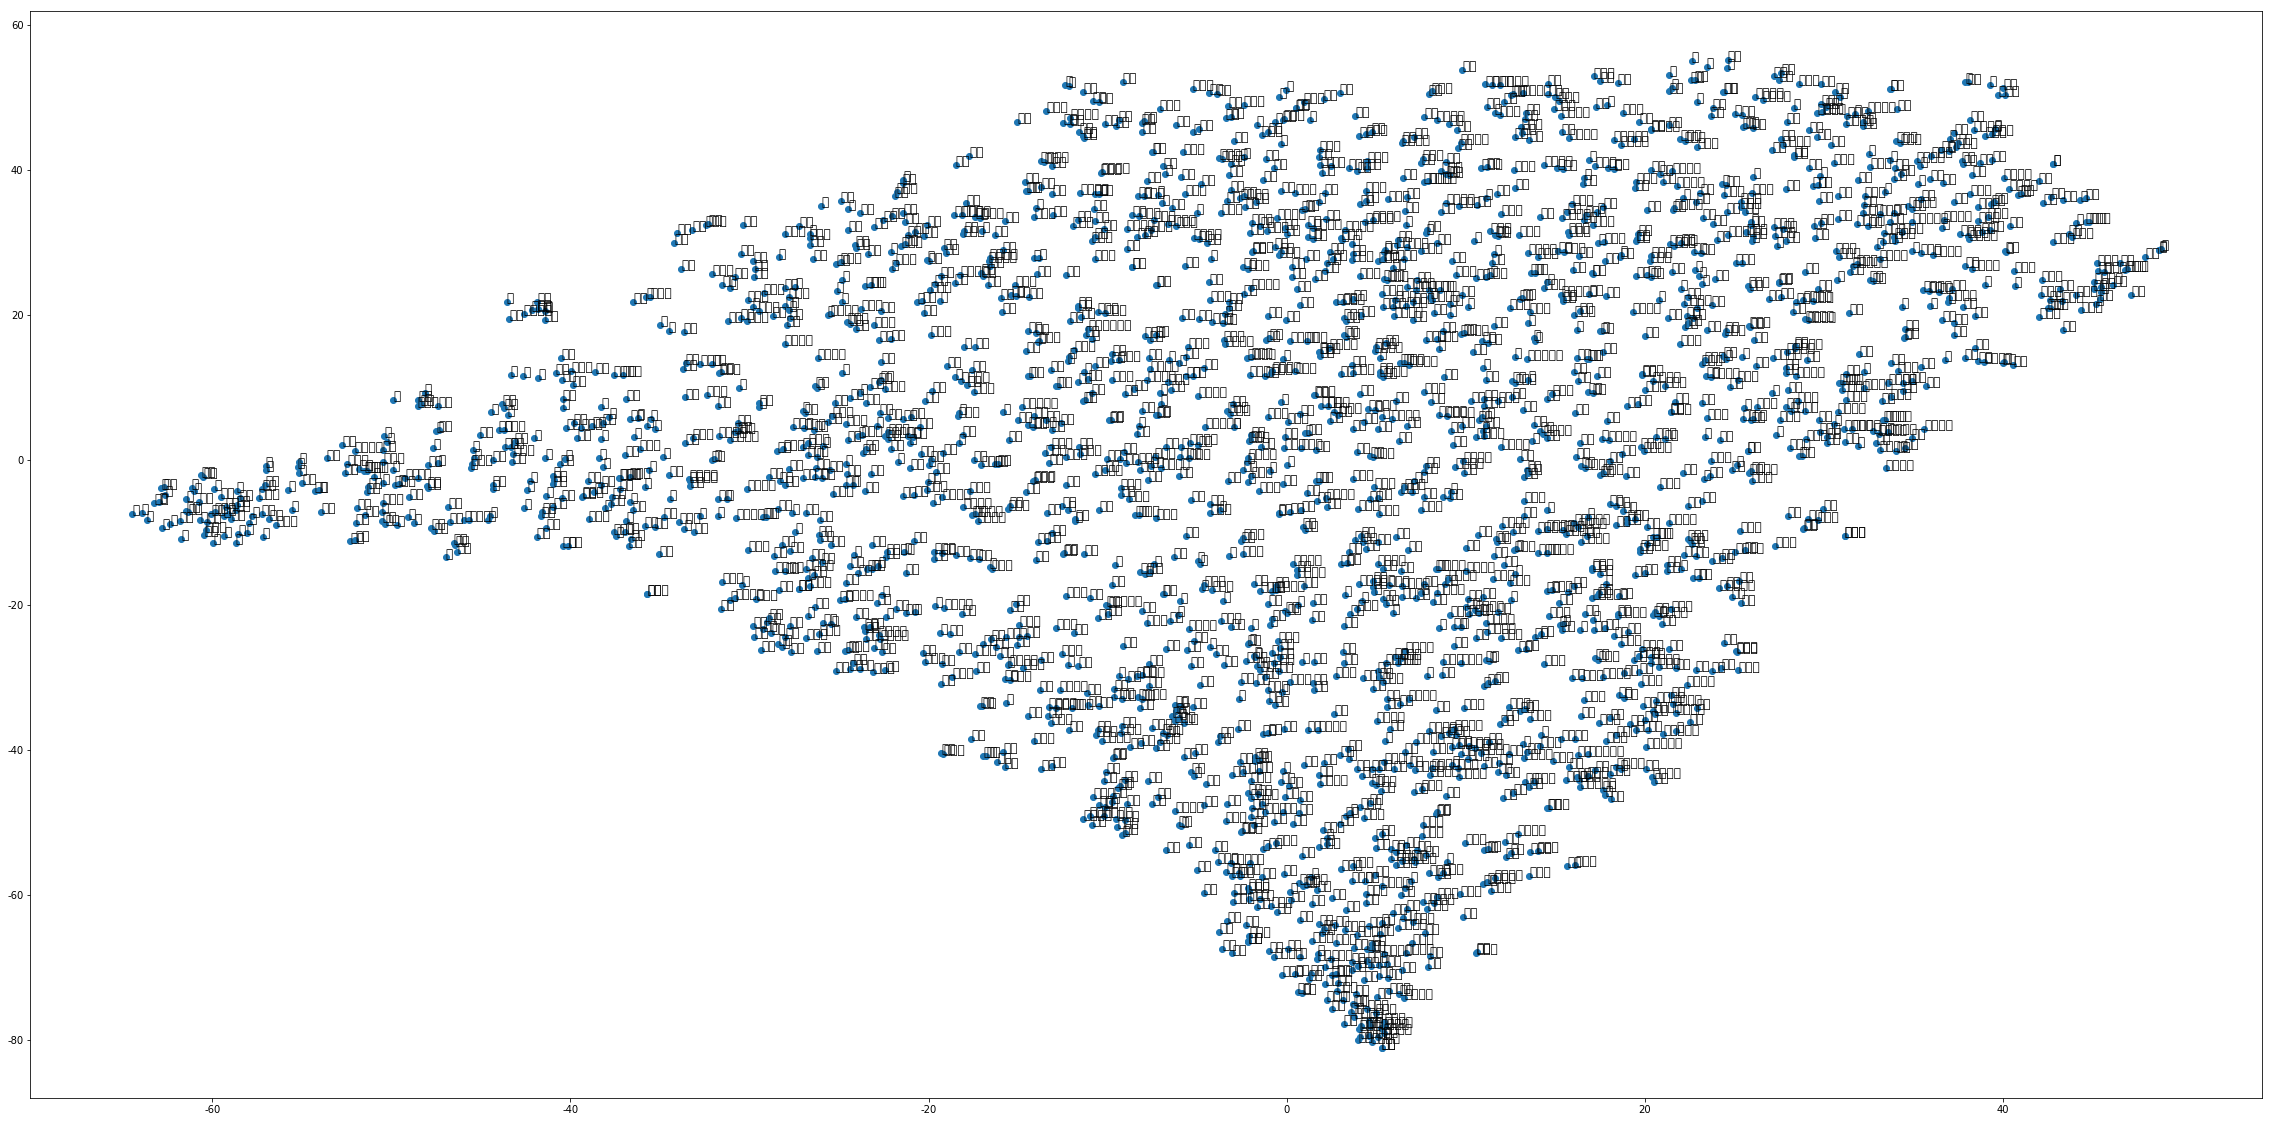

In [17]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=12)
plt.show()